<a href="https://colab.research.google.com/github/Nikhileswar-Komati/100D_ML/blob/master/D_1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/train_ctrUa4K.csv', index_col='Loan_ID')

###Basic Methods

In [ ]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
LP002753,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y
LP001734,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban,Y
LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N


In [ ]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
from scipy.stats import mode
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_to_impute = pd.pivot_table(data = data, values = 'LoanAmount', index = ['Gender', 'Married', 'Self_Employed'], aggfunc='mean')
data_to_impute

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [ ]:
data_to_impute.loc[('Female')]

LoanAmount
Married Self_Employed            
No      No             114.691176
        Yes            125.800000
Yes     No             134.222222
        Yes            282.250000

In [ ]:
for i,row in data.loc[data['LoanAmount'].isnull()].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  data.loc[i,'LoanAmount'] = data_to_impute.loc[ind].values[0]

In [ ]:
def percConvert(ser):
  return ser/float(ser[-1])
df = pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)
df.columns

Index(['N', 'Y', 'All'], dtype='object', name='Loan_Status')

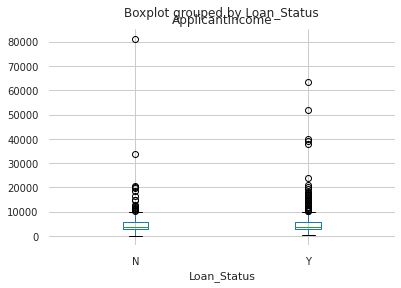

In [62]:
# import matplotlib.pyplot as plt
# %matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f97f266a0>,
      dtype=object)

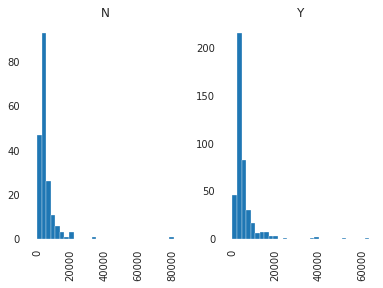

In [66]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

In [67]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data) 
prof

In [ ]:
from scipy.stats import mode
mode(data['gender']).mode[0]

'female'

In [ ]:
data.iloc[:5, :-1]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
